## Loading the Fish_Pond Dataset

In [1]:
import pandas as pd

## working on only 1 part of data

In [3]:
df = pd.read_csv('IoTpond1.csv')

## Performing EDA on dataset

In [4]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [5]:
df.isnull()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
83121,False,False,False,False,False,False,False,False,False,False,False
83122,False,False,False,False,False,False,False,False,False,False,False
83123,False,False,False,False,False,False,False,False,False,False,False
83124,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83126 entries, 0 to 83125
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              83126 non-null  object 
 1   entry_id                83126 non-null  int64  
 2   Temperature (C)         83126 non-null  float64
 3   Turbidity(NTU)          83126 non-null  int64  
 4   Dissolved Oxygen(g/ml)  83126 non-null  float64
 5   PH                      83126 non-null  float64
 6   Ammonia(g/ml)           83074 non-null  float64
 7   Nitrate(g/ml)           83126 non-null  int64  
 8   Population              83126 non-null  int64  
 9   Fish_Length(cm)         83124 non-null  float64
 10  Fish_Weight(g)          83124 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.0+ MB


## Finding Noise and removing it from dataset

### Dealing with Null values

In [7]:
df.isnull().sum()

created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64

In [8]:
# Check for missing values and handle them
print("Count of missing values in each column before handling:")
print(df.isnull().sum())

df = df.dropna()

print("\nCount of missing values in each column after handling:")
print(df.isnull().sum())

Count of missing values in each column before handling:
created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64

Count of missing values in each column after handling:
created_at                0
entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64


### Dealing with duplicate values

In [9]:
# Identify duplicate values
print("Original DataFrame:")
print(df)

print("\nRows that are duplicates of a previous row:")
print(df.duplicated())

Original DataFrame:
                    created_at  entry_id  Temperature (C)  Turbidity(NTU)  \
0      2021-06-19 00:00:05 CET      1889          24.8750             100   
1      2021-06-19 00:01:02 CET      1890          24.9375             100   
2      2021-06-19 00:01:22 CET      1891          24.8750             100   
3      2021-06-19 00:01:44 CET      1892          24.9375             100   
4      2021-06-19 00:02:07 CET      1893          24.9375             100   
...                        ...       ...              ...             ...   
83121  2021-10-13 02:48:31 CET    247201          26.5625             100   
83122  2021-10-13 03:17:36 CET    247273          26.5625             100   
83123  2021-10-13 03:46:49 CET    247336          26.5000             100   
83124  2021-10-13 04:13:23 CET    247402          26.3750             100   
83125  2021-10-13 04:14:22 CET    247405          26.3750             100   

       Dissolved Oxygen(g/ml)       PH  Ammonia(g/ml)  

In [10]:
# Drop duplicate values
df = df.drop_duplicates()

print("\nDataFrame after dropping duplicate rows:")
print(df)


DataFrame after dropping duplicate rows:
                    created_at  entry_id  Temperature (C)  Turbidity(NTU)  \
0      2021-06-19 00:00:05 CET      1889          24.8750             100   
1      2021-06-19 00:01:02 CET      1890          24.9375             100   
2      2021-06-19 00:01:22 CET      1891          24.8750             100   
3      2021-06-19 00:01:44 CET      1892          24.9375             100   
4      2021-06-19 00:02:07 CET      1893          24.9375             100   
...                        ...       ...              ...             ...   
83121  2021-10-13 02:48:31 CET    247201          26.5625             100   
83122  2021-10-13 03:17:36 CET    247273          26.5625             100   
83123  2021-10-13 03:46:49 CET    247336          26.5000             100   
83124  2021-10-13 04:13:23 CET    247402          26.3750             100   
83125  2021-10-13 04:14:22 CET    247405          26.3750             100   

       Dissolved Oxygen(g/ml)    

In [11]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


## Note: One can observe that form original dataset there are 83126 values from which we have removed null and duplicacy and now we have about 83072 values

In [12]:
print(df.dtypes)

created_at                 object
entry_id                    int64
Temperature (C)           float64
Turbidity(NTU)              int64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Ammonia(g/ml)             float64
Nitrate(g/ml)               int64
Population                  int64
Fish_Length(cm)           float64
Fish_Weight(g)            float64
dtype: object


In [13]:
print(df.describe())

            entry_id  Temperature (C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)  \
count   83072.000000     83072.000000    83072.000000            83072.000000   
mean    84048.115466        24.573335       87.482028               12.393208   
std     53581.214847         0.861756       25.865811               12.520521   
min      1889.000000      -127.000000        1.000000                0.007000   
25%     24898.750000        24.125000       91.000000                3.440000   
50%    103611.500000        24.562500      100.000000                7.133000   
75%    131088.250000        24.937500      100.000000               15.836750   
max    247405.000000        27.750000      100.000000               41.046000   

                PH  Ammonia(g/ml)  Nitrate(g/ml)  Population  Fish_Length(cm)  \
count  83072.00000   8.307200e+04   83072.000000     83072.0     83072.000000   
mean       7.51818   2.030866e+08     458.500277        50.0        16.417063   
std        0.53491   7.8663

## Removing the irrelavnt columns from dataset there are two columns which are not affecting the target values so we are removing "created_at" and "entry_id" from original data.

In [14]:
df = df.drop(['created_at', 'entry_id'], axis=1)

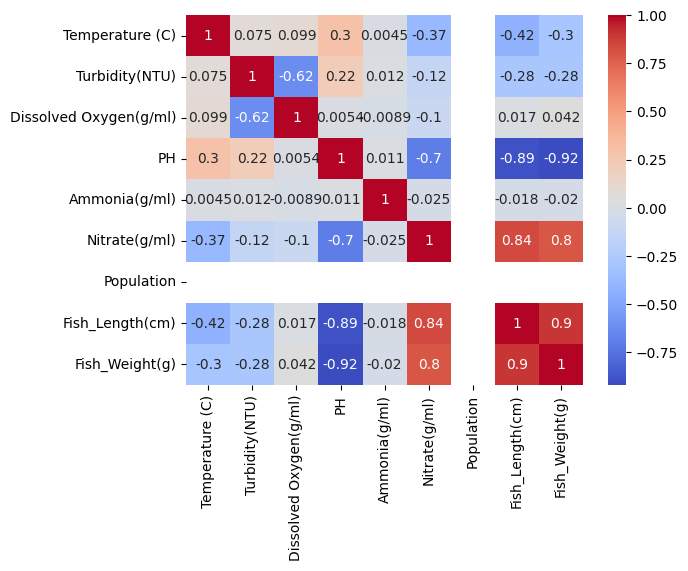

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
df

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91
...,...,...,...,...,...,...,...,...,...
83121,26.5625,100,0.441,2.56412,5.91282,946,50,33.45,318.64
83122,26.5625,100,1.020,2.67760,4.21414,985,50,33.45,318.64
83123,26.5000,100,0.852,2.45063,8.18873,963,50,33.45,318.64
83124,26.3750,100,4.850,2.41885,10.62411,944,50,33.45,318.64


# Conclusion: We have performed Data Analysis(EDA)/ preprocessing of dataset. In our dataset we are focusing on maintain the Ph qaulity of water for certain sets conditions.

# My GitHub_proje Link: https://github.com/shivam2952002/L-and-T-project-